##Se importan las Libreria

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

##Se importan los Datos del precio de celulares y sus diferentes caracteristica

In [3]:
df=pd.read_csv('/content/Cellphone (1).csv')
df.head(10)                                   ##Se muestran las 10 primeras filas del dataframe

FileNotFoundError: [Errno 2] No such file or directory: '/content/Cellphone (1).csv'

##Gráfica de Variables

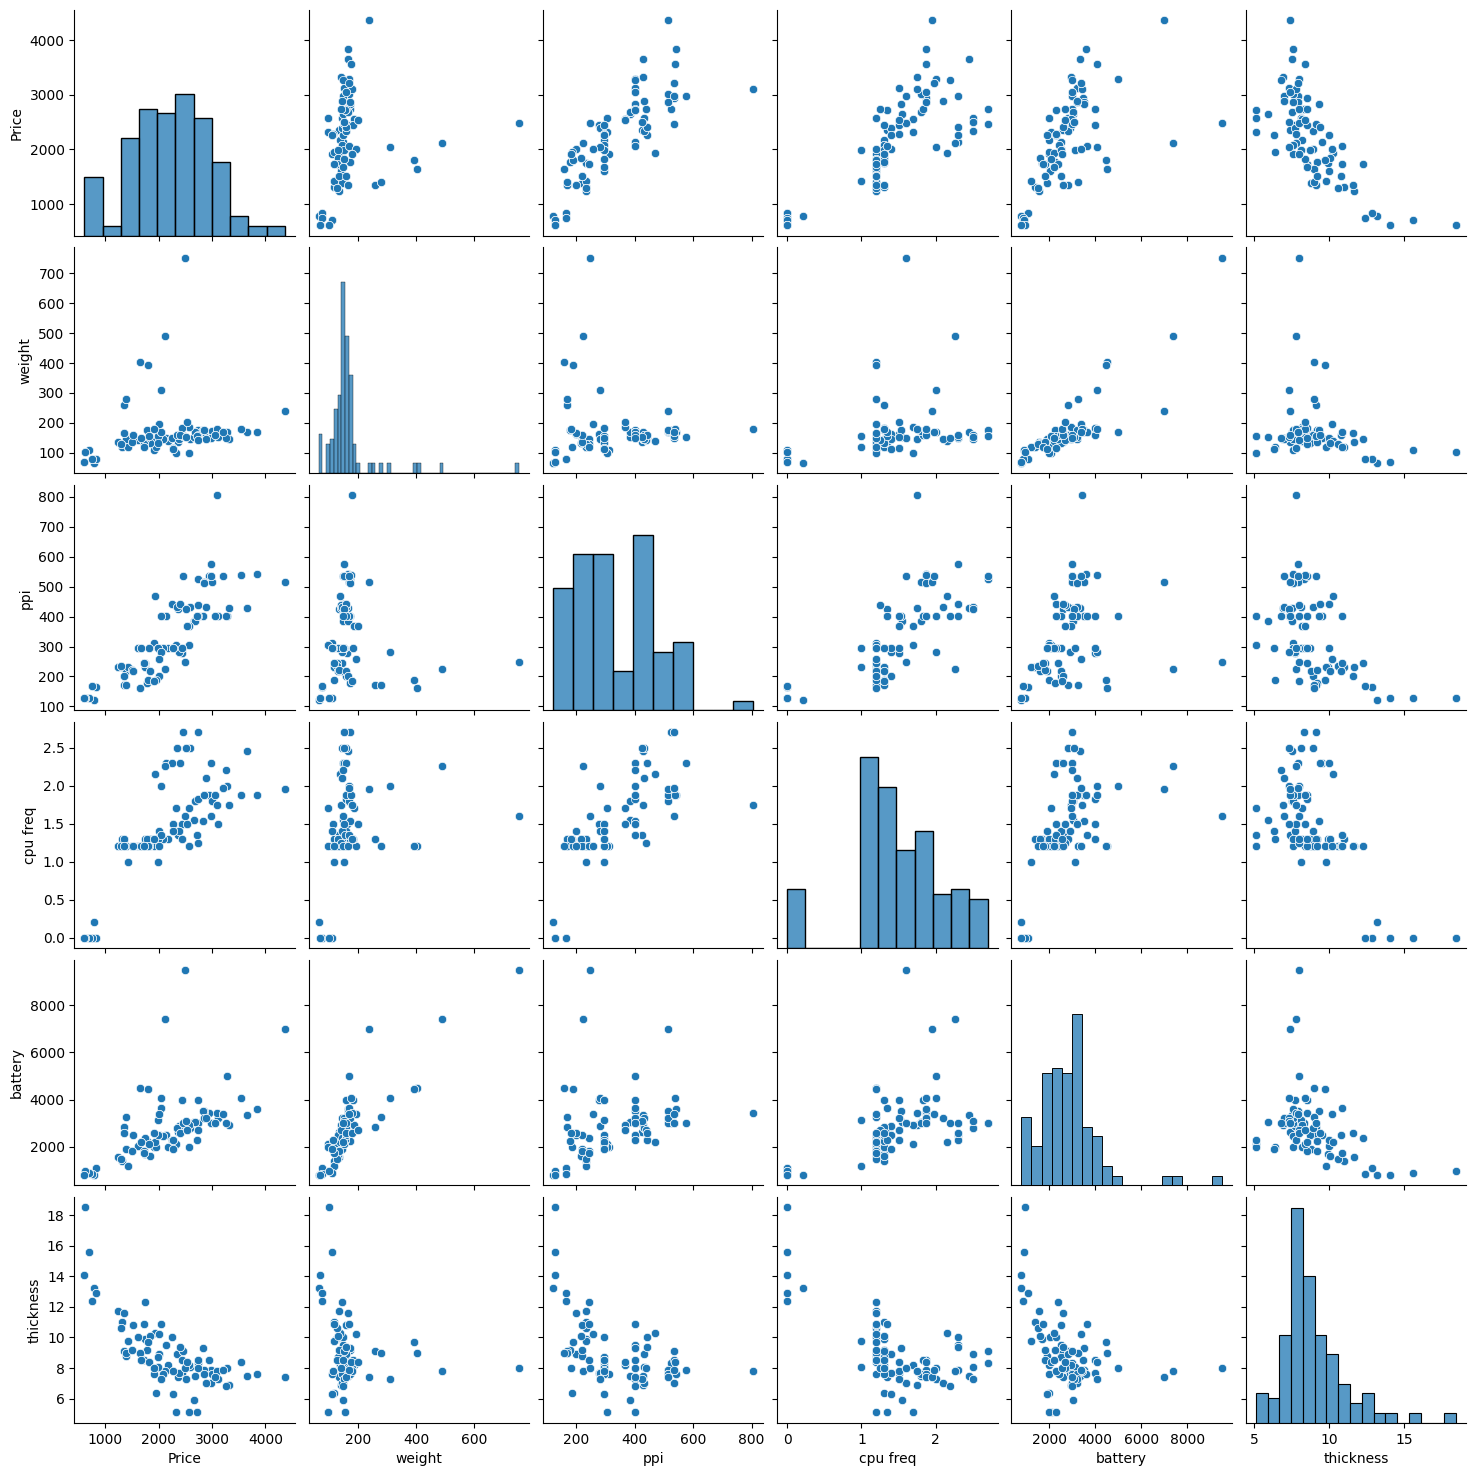

In [ ]:
df = df.loc[:, ['Price', 'weight', 'ppi', 'cpu freq', 'battery', 'thickness']]          #se seleccionan solo esas columnas para realizar el pairplot
sns.pairplot(df)
plt.show()

## Data splitting

In [ ]:
X = df['battery'].values.reshape(-1,1)              #Datos conocidos
y = df['Price'].values.reshape(-1,1)                #Se va a estimar el precio en función de la bateria

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)        #Se definen los datos de entreno, prueba

## Preselecciono un modelo usando k-fold

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


regression = [SVR(),ElasticNet(),DecisionTreeRegressor(), RandomForestRegressor()]            #Se preseleccionan 4 diferentes modelos de regresión y se evaluará cual funciona mejor

score_matrix = [['SVR',0,0],
                ['ElasticNet',0,0],
                ['Tree',0,0],
                ['Forest',0,0]
]

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

i = 0

K = KFold(n_splits=10,shuffle=False)

for model in regression:
    scores = cross_val_score(estimator=model, X = X_train, y = y_train, cv = K)
    score_matrix[i][1] = scores.mean()
    score_matrix[i][2] = scores.std()
    i+=1

In [ ]:
score_matrix

[['SVR', -0.14429751454367373, 0.17441623848008778],
 ['ElasticNet', 0.16187643881462413, 0.36619526610016434],
 ['Tree', 0.657614260861678, 0.28911908001654135],
 ['Forest', 0.6032250380530537, 0.23229209914213825]]

## Escojo el mejor modelo de Regresión y lo entreno

Por favor da click en el link si deseas saber sobre el modelo seleccionado

[Regresión por arboles de desicción](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

In [ ]:
model =DecisionTreeRegressor()          #se seleccionó el modelo de regresión lineal decisiontreeRegressor porque fue el que mejor se ajustó
model.fit(X_train, y_train)             #Se entrena el modelo por medio de los datos de battery y Price

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)          #Por medio de lo que aprendió el modelo se hace la predicción con los datos que no conoce
print(np.shape(y_pred))
print(np.shape(X_test))

(54,)
(54, 1)


In [ ]:
R=r2_score(y_test, y_pred)            #Se verifica el índice de correlación evaluar el rendimiento
print(R)


0.7083248151312953


##Gráfico de dispersión de los datos (reales y estimados)

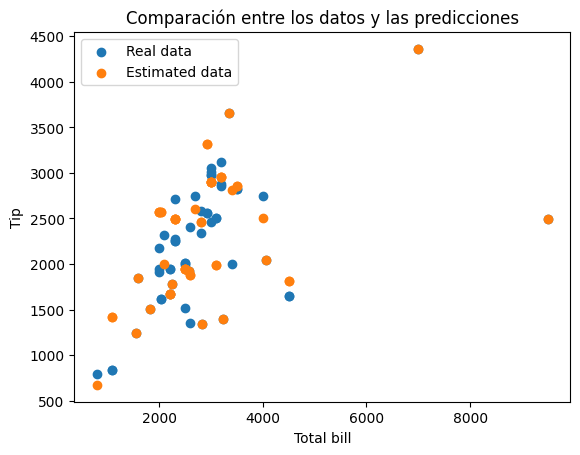

In [ ]:
plt.scatter(X_test,y_test, label='Real data')
plt.scatter(X_test, y_pred, label='Estimated data')
plt.legend()
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Comparación entre los datos y las predicciones")
plt.show()